In [1]:
!pip install ultralytics
# !pip install opencv-python==4.8.0.74
# !pip install wandb

In [2]:
from ultralytics import YOLO

In [3]:
# import ultralytics
# print(ultralytics.__version__)


In [4]:
# Enter training folder
# %cd /home/oracl4/project/RoadDamageDetection/training

In [5]:
# !ls dataset/rddJapanIndiaFiltered/

In [6]:
# Change the datasets_dir value if you found path issue
# !yolo settings
# !gedit ~/.config/Ultralytics/settings.yaml

In [7]:

import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("Current GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA available: True
Number of GPUs: 1
Current GPU: NVIDIA GeForce RTX 4050 Laptop GPU


In [8]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example: create a tensor on GPU
x = torch.randn(3, 3).to(device)
print(x.device)

# Example: move a model to GPU



cuda:0


In [9]:
# Project Name
_project = "C:\Github Repo\AI-Powered-Road-Pothole-Detection\model_data"
_name = "Baseline_YOLOv8Small_Filtered"
_data = "C:\Github Repo\AI-Powered-Road-Pothole-Detection\\test\data.yaml"

# Epoch and warmup epoch
_epoch = 100
_warmup_epochs = int(_epoch*0.05)

# model = YOLO('yolov8s.pt')
model = YOLO('yolov8s.pt')
model.to(device)
results = model.train(data=_data,
                      epochs=_epoch,
                      warmup_epochs=_warmup_epochs,
                      batch=12,
                      imgsz=640,
                      save_period=10,
                      workers=1,
                      project=_project,
                      name=_name,
                      seed=1337,
                      cos_lr=True,
                      mosaic=0.0,
                      device=0,
                      save=True,
                      
)

New https://pypi.org/project/ultralytics/8.4.3 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.0  Python-3.11.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=C:\Github Repo\AI-Powered-Road-Pothole-Detection\test\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=0.0, multi_

In [10]:

from pathlib import Path

import shutil

try:
    run_dir = Path(model.trainer.save_dir)  # e.g., training/RDD_JapanIndia/Baseline_YOLOv8Small_Filtered2
except Exception:
    # Fallback if needed
    run_dir = Path(_project) / _name

best_src = run_dir / "weights" / "best.pt"

# Target folder (Windows path with spaces—use raw string r"...")
target_dir = Path(r"C:\Github Repo\AI-Powered-Road-Pothole-Detection\model_data")
target_dir.mkdir(parents=True, exist_ok=True)

best_dst = target_dir / "best.pt"

# Copy best model to the target directory
if best_src.exists():
    shutil.copy2(best_src, best_dst)
    print(f"[OK] Copied best model to: {best_dst}")
else:
    raise FileNotFoundError(f"Could not find best.pt at {best_src}. "
                            f"Check your project/name or whether training completed.")


[OK] Copied best model to: C:\Github Repo\AI-Powered-Road-Pothole-Detection\model_data\best.pt


In [ ]:
!pip install pandas

In [12]:
import pandas as pd

csv_path = r"C:\Github Repo\AI-Powered-Road-Pothole-Detection\model_data\Baseline_YOLOv8Small_Filtered\results.csv"
df = pd.read_csv(csv_path)

print(df.columns.tolist())


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2', 'lr/pg3', 'lr/pg4', 'lr/pg5', 'lr/pg6', 'lr/pg7']


In [13]:
%matplotlib inline


In [14]:
print(df[['epoch', 'metrics/mAP50(B)', 'train/box_loss']].head(10))
print("Unique epochs:", df['epoch'].unique())


   epoch  metrics/mAP50(B)  train/box_loss
0      1           0.00008         3.21782
1      2           0.00043         3.22939
2      3           0.01969         2.83988
3      4           0.05389         2.55585
4      5           0.08688         2.35912
5      6           0.14009         2.28185
6      7           0.18185         2.24310
7      8           0.22486         2.14843
8      9           0.23257         2.16132
9     10           0.23900         2.07962
Unique epochs: [ 1  2  3  4  5  6  7  8  9 10]


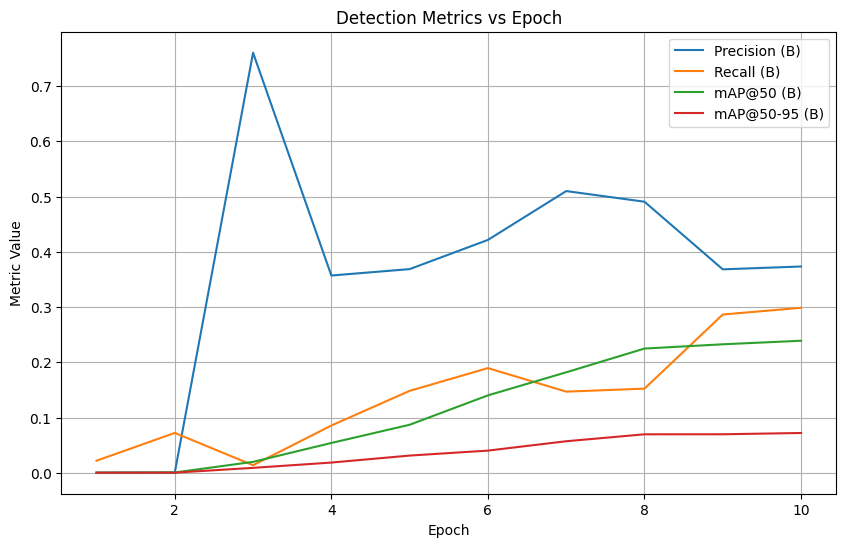

In [21]:
plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision (B)')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall (B)')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50 (B)')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95 (B)')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Detection Metrics vs Epoch')
plt.legend()
plt.grid(True)
plt.show()



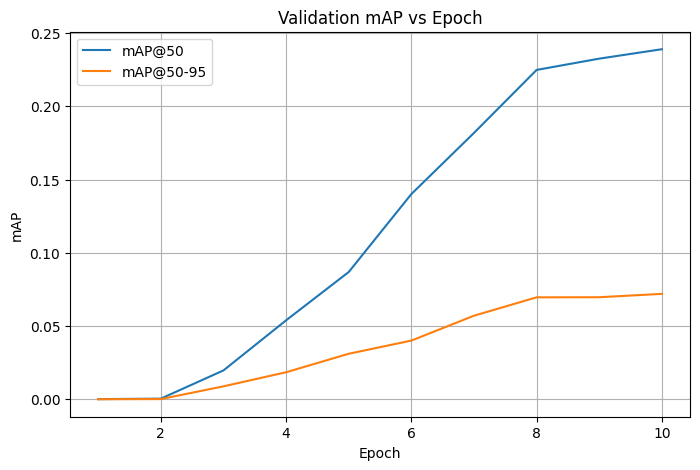

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = r"C:\Github Repo\AI-Powered-Road-Pothole-Detection\model_data\Baseline_YOLOv8Small_Filtered\results.csv"
df = pd.read_csv(csv_path)

plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Validation mAP vs Epoch')
plt.legend()
plt.grid(True)
plt.show()



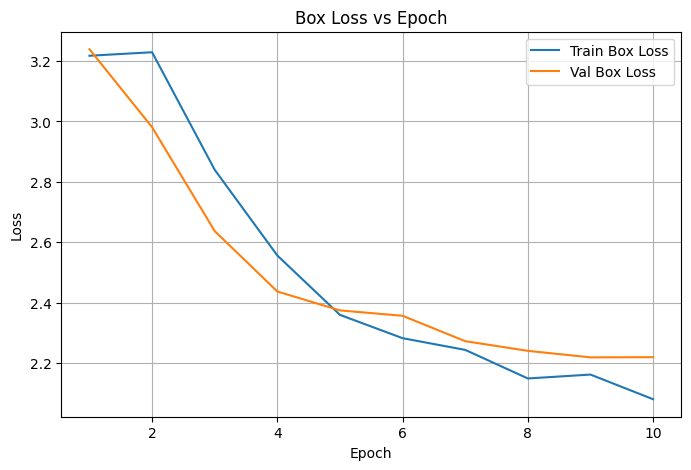

In [16]:
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Box Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


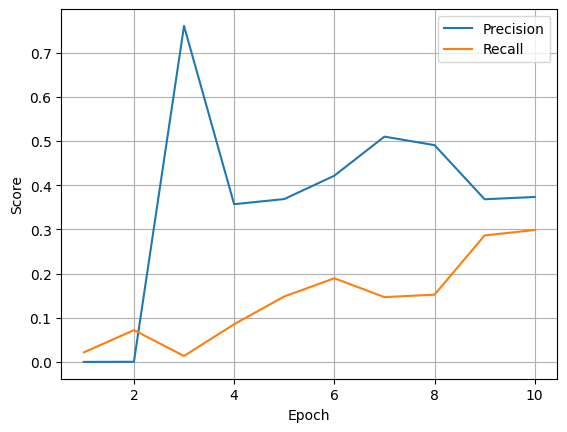

In [17]:
plt.figure()
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


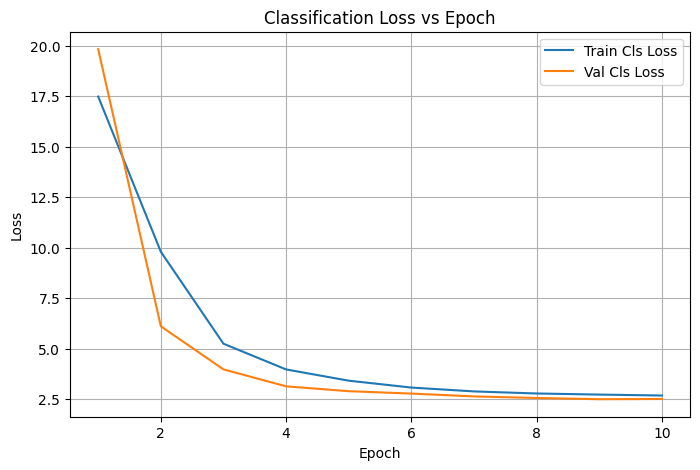

In [18]:
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Classification Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


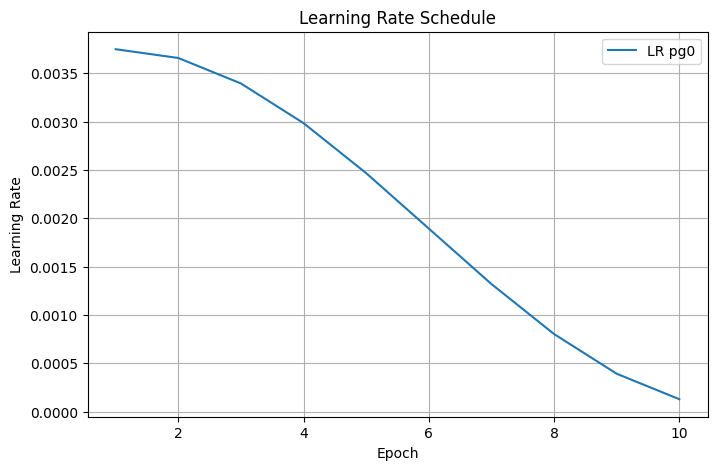

In [19]:
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['lr/pg0'], label='LR pg0')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# from ultralytics import YOLO
#
# # -------------------------
# # Training configuration
# # -------------------------
# _epoch = 100
# _warmup_epochs = int(_epoch * 0.05)
#
# _data = "C:\\GithubProjects\\AI-Powered-Road-Pothole-Detection\\test\\data.yaml"
# _project = "runs/train"
# _name = "yolov8_custom"
#
# # -------------------------
# # Load model
# # -------------------------
# model = YOLO("yolov8s.pt")  # pretrained weights
#
# # -------------------------
# # Train
# # -------------------------
# results = model.train(
#     data=_data,
#     epochs=_epoch,
#     warmup_epochs=_warmup_epochs,
#     batch=32,
#     imgsz=640,
#     save_period=10,
#     workers=1,
#     project=_project,
#     name=_name,
#     seed=1337,
#     cos_lr=True,
#     mosaic=0.0
# )


In [ ]:
import os

label_dir = r"C:\Projects Datasets\RoadDamageDetection\processedData_900\RoadDamageDetection\labels\train"
print(len(os.listdir(label_dir)))
print(os.listdir(label_dir)[:5])
